Lab 2 - Amandeep Kaur - 8896062

Part A
Use the Lab2 dataset provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
lab2Data = pd.read_csv("Lab2_dataset.csv")
lab2Data.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
5,2949,ham,Subject: ehronline web address change\nthis me...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


Split the data

In [3]:
# Split the dataset into features (X) and labels (y)
X = lab2Data['text']
y = lab2Data['label_num']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert the text data to TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)

# Train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Evaluate the performance of the models
gnb_accuracy = gnb.score(X_test_tfidf.toarray(), y_test)
mnb_accuracy = mnb.score(X_test_tfidf, y_test)
print("Accuracy of Gaussian Naive Bayes:", gnb_accuracy)
print("Accuracy of Multinomial Naive Bayes:", mnb_accuracy)

# Perform predictions on the test data using the best performing model
if gnb_accuracy > mnb_accuracy:
    predictions = gnb.predict(X_test_tfidf.toarray())
    best_model_name = "Gaussian Naive Bayes"
else:
    predictions = mnb.predict(X_test_tfidf)
    best_model_name = "Multinomial Naive Bayes"

print("Predictions using the best performing model:", best_model_name)
print(predictions)

Accuracy of Gaussian Naive Bayes: 0.9497584541062802
Accuracy of Multinomial Naive Bayes: 0.8772946859903382
Predictions using the best performing model: Gaussian Naive Bayes
[0 1 0 ... 1 0 0]


Part B
Use this air bnb new york city dataset and remove outliers based on price per night for a given apartment/home. You can demonstrate why using other techniques like mean/median/ percentile works. The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [10]:
# Load the dataset from CSV file
data_air = pd.read_csv('AB_NYC_2019.csv')
data_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [11]:
# Count the number of null values in each column
null_rows = data_air.isnull().sum()

# Find duplicate rows in the dataset
duplicate_rows = data_air[data_air.duplicated()]

# Print the count of null values in each column
print("Count of null values in each column:")
print(null_rows)

# Print the duplicate rows in the dataset
print("Duplicate rows in the dataset:")
print(duplicate_rows)

Count of null values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Duplicate rows in the dataset:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


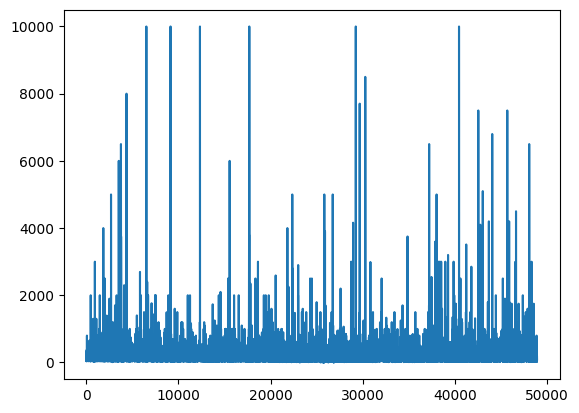

In [13]:
plt.plot(data_air['price']) 

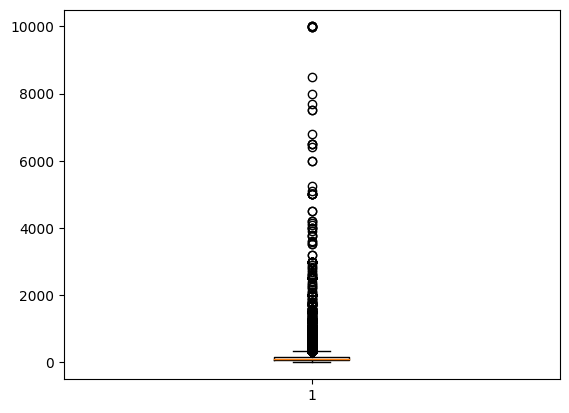

In [16]:

# Create a box plot for the "price" column in the airData dataset
plt.boxplot(data_air["price"])

# Display the box plot
plt.show()



In [18]:
# Calculate the interquartile range (IQR) for the 'price' column in the data_air dataset
q1 = np.percentile(data_air['price'], 25)
q3 = np.percentile(data_air['price'], 75)
iqr = q3 - q1

# Print the calculated IQR
print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 106.0


In [20]:
# Get the 'price' column from the data_air dataset
prices = data_air['price']

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
q1 = np.percentile(prices, 25)
q3 = np.percentile(prices, 75)
iqr = q3 - q1

# Define the lower and upper boundaries
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Print the lower and upper boundaries
print("Lower Boundary:", lower_bound)
print("Upper Boundary:", upper_bound)

Lower Boundary: -90.0
Upper Boundary: 334.0


In [25]:
# Identify the outliers based on the lower and upper boundaries
outliers = data_air[(data_air['price'] < lower_bound) | (data_air['price'] > upper_bound)]

# Print the outliers' IDs and prices
print("Outliers (ID, Price):")
print(outliers[['id', 'price']])

# Create a list of outlier IDs to be removed

outlierIds = list(outliers['id'])

Outliers (ID, Price):
             id  price
61        15396    375
85        19601    800
103       23686    500
114       26933    350
121       27659    400
...         ...    ...
48758  36420289    350
48833  36450896    475
48839  36452721    800
48842  36453160    350
48856  36457700    345

[2972 rows x 2 columns]


In [27]:
# Delete rows based on the outlier IDs list
filtered_data = data_air[~data_air['id'].isin(outlier_ids)]

# Get the length of the filtered DataFrame
filtered_length = len(filtered_data)

# Calculate the mean and median of the 'price' column in the filtered DataFrame
price_mean = filtered_data['price'].mean()
price_median = filtered_data['price'].median()

# Print the results
print("Length of filtered DataFrame:", filtered_length)
print("Mean price in filtered DataFrame:", price_mean)
print("Median price in filtered DataFrame:", price_median)

Length of filtered DataFrame: 45923
Mean price in filtered DataFrame: 119.97031988328288
Median price in filtered DataFrame: 100.0


In [28]:
# Calculate descriptive statistics for the 'price' column in the filtered DataFrame
cleaned_stats = filtered_data['price'].describe()

# Print the descriptive statistics
print("Summary statistics of cleaned DataFrame (Price):")
print(cleaned_stats)

Summary statistics of cleaned DataFrame (Price):
count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64


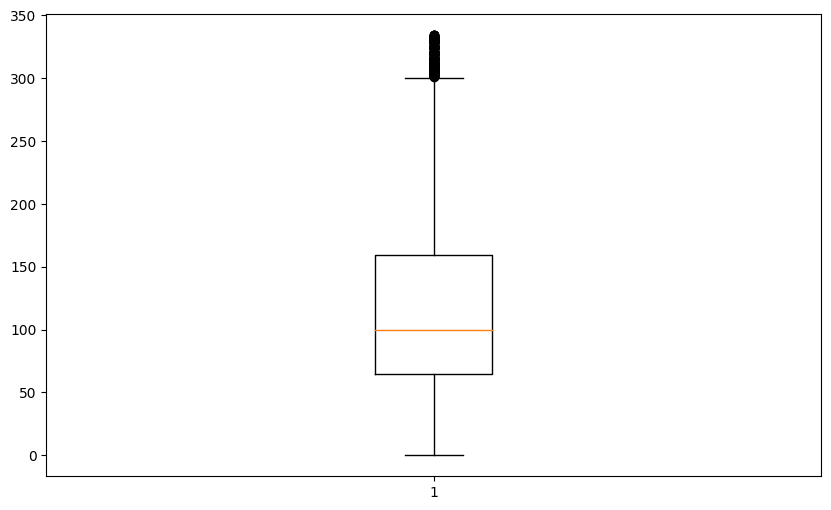

In [29]:
# Create a figure and set the size
figure = plt.figure(figsize=(10, 6))

# Create a box plot for the 'price' column in the filtered DataFrame
plt.boxplot(filtered_data['price'])

# Display the box plot
plt.show()